In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
gen5_stats_df = pd.read_csv(r"dataset/bulbagarden/pokemon_gen5_stats.csv")
gen5_stats_df

,Pokedex number,Name,HP,Attack,Special Attack,Defense,Special Defense,Speed,Stat total,Stat average
0,1,Bulbasaur,45,49,49,65,65,45,318,53.00
1,2,Ivysaur,60,62,63,80,80,60,405,67.50
2,3,Venusaur,80,82,83,100,100,80,525,87.50
3,4,Charmander,39,52,43,60,50,65,309,51.50
4,5,Charmeleon,58,64,58,80,65,80,405,67.50
...,...,...,...,...,...,...,...,...,...,...
665,647,Keldeo,91,72,90,129,90,108,580,96.67
666,647,Keldeo-Resolute,91,72,90,129,90,108,580,96.67
667,648,Meloetta,100,77,77,128,128,90,600,100.00
668,648,Meloetta-Pirouette,100,128,90,77,77,128,600,100.00


In [37]:
gen5ou_df = pd.read_csv(r"dataset/showdown/showdown.csv")
gen5ou_df

,Tag,Player,Elo,Pokemon 1,Pokemon 2,Pokemon 3,Pokemon 4,Pokemon 5,Pokemon 6,LeadPokemon,TurnCount,Result
0,1000949555,HaxerShouldAllDie,1444,Infernape,Breloom,Tyranitar,Jellicent,Bronzong,Reuniclus,Infernape,24,lose
1,1000956864,HaxerShouldAllDie,1365,Infernape,Breloom,Tyranitar,Jellicent,Bronzong,Reuniclus,Infernape,18,lose
2,100157536,BigBadLeroyBrown,1306,Tyranitar,Alakazam,Latios,Ferrothorn,Landorus-Therian,Excadrill,Tyranitar,31,win
3,1001647389,testing4g4in,1488,Tyranitar,Amoonguss,Starmie,Alakazam,Heatran,Skarmory,Starmie,22,lose
4,100171063,bossaru2,1377,Tyranitar,Stoutland,Forretress,Salamence,Gliscor,Breloom,Breloom,24,lose
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,996528128,phosphor display,1347,Excadrill,Tyranitar,Gastrodon,Tangrowth,Skarmory,Hydreigon,Tangrowth,10,win
4996,996530860,Machine Gun Dragon,1513,Alakazam,Garchomp,Gastrodon,Skarmory,Tyranitar,Gengar,Gengar,38,win
4997,996685781,Wishmence2003,1316,Tyranitar,Landorus-Therian,Slowking,Excadrill,Latios,Scizor,Slowking,25,lose
4998,99696822,Level 56,1415,Scizor,Latios,Tyranitar,Landorus-Therian,Terrakion,Magnezone,Tyranitar,24,lose


In [38]:
pd.unique(pd.concat([gen5ou_df[f"Pokemon {i}"] for i in range(1, 7)], axis=0))


array(['Infernape', 'Tyranitar', 'Tornadus', 'Gengar', 'Toxicroak',
       'Skarmory', 'Victini', 'Hippowdon', 'Garchomp', 'Jellicent',
       'Politoed', 'Breloom', 'Ninetales', 'Bronzong', 'Alakazam',
       'Chansey', 'Abomasnow', 'Latios', 'Rotom-Wash', 'Ferrothorn',
       'Landorus-Therian', 'Scizor', 'Cofagrigus', 'Mamoswine', 'Starmie',
       'Lucario', 'Feraligatr', 'Dragonite', 'Aerodactyl', 'Latias',
       'Slaking', 'Floatzel', 'Amoonguss', 'Azelf', 'Blissey', 'Heatran',
       'Togekiss', 'Espeon', 'Thundurus-Therian', 'Terrakion', 'Porygon2',
       'Magnezone', 'Keldeo', 'Volcarona', 'Bisharp', 'Celebi', 'Jirachi',
       'Kyurem-Black', 'Excadrill', 'Rhyperior', 'Reuniclus', 'Umbreon',
       'Articuno', 'Froslass', 'Cloyster', 'Tentacruel', 'Metagross',
       'Yanmega', 'Staraptor', 'Gliscor', 'Hydreigon', 'Forretress',
       'Shelmet', 'Salamence', 'Zoroark', 'Heracross', 'Zapdos',
       'Seismitoad', 'Dusclops', 'Sharpedo', 'Gyarados', 'Sableye',
       'Slowbro

In [46]:
stats = ['HP', 'Attack', 'Special Attack', 'Defense', 'Special Defense', 'Speed']

for stat in stats:
    gen5ou_df[f'Avg_{stat}'] = 0
    gen5ou_df[f'LeadAvg_{stat}'] = 0

for row in gen5ou_df.itertuples():
    pkmn_name = gen5ou_df.at[row.Index, f"LeadPokemon"]
    if pd.notna(pkmn_name):
        # print(pkmn_name)
        for stat in stats:
            leadStat = gen5_stats_df.loc[gen5_stats_df['Name'] == pkmn_name, stat].values[0]
            gen5ou_df.at[row.Index, f'Lead_{stat}'] = leadStat
    for i in range(1, 7):
        pkmn_name = gen5ou_df.at[row.Index, f"Pokemon {i}"]
        # print(pkmn_name)
        for stat in stats:
            stat_point = gen5_stats_df.loc[gen5_stats_df['Name'] == pkmn_name, stat].values[0]
            # print(f" {stat_point}")
            gen5ou_df.at[row.Index, f'Avg_{stat}'] += stat_point / 6
            
gen5ou_df.to_csv('filename.csv', index=False)

C:\Users\Job D. Trocino\AppData\Local\Temp\ipykernel_352\607074487.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '12.666666666666666' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gen5ou_df.at[row.Index, f'Avg_{stat}'] += stat_point / 6
C:\Users\Job D. Trocino\AppData\Local\Temp\ipykernel_352\607074487.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '17.333333333333332' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  gen5ou_df.at[row.Index, f'Avg_{stat}'] += stat_point / 6
C:\Users\Job D. Trocino\AppData\Local\Temp\ipykernel_352\607074487.py:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11.833333333333334' has dtype incompatible with int64, plea

### Lead Pokemon stat distribution

The lead Pokemon of a team can set the pace of a match. Because of this
the choice of which Pokemon to send out is very important to a player.

With this in mind, we wanted to view the distribution of the stats
of each lead Pokemon in order to understand if the stats of a Pokemon
play a factor in why it is chosen as the lead.

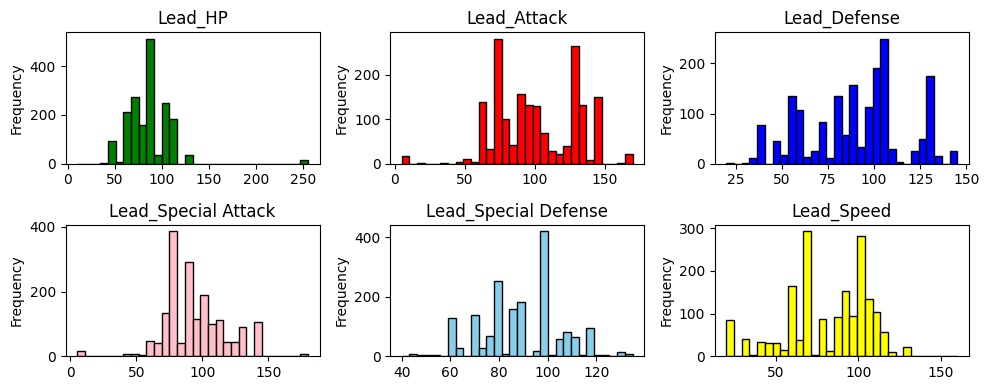

In [53]:
unique_players_df = gen5ou_df.drop_duplicates(subset="Player", keep="first")
unique_players_df

fig, ax = plt.subplots(2, 3, figsize=(10, 4))

ax[0,0].hist(unique_players_df['Lead_HP'].dropna(),bins=30, color='green', edgecolor='black')
ax[0,0].set_title('Lead_HP')
ax[0,0].set_ylabel('Frequency')

ax[0,1].hist(unique_players_df['Lead_Attack'].dropna(),bins=30, color='red', edgecolor='black')
ax[0,1].set_title('Lead_Attack')
ax[0,1].set_ylabel('Frequency')

ax[0,2].hist(unique_players_df['Lead_Defense'].dropna(),bins=30, color='blue', edgecolor='black')
ax[0,2].set_title('Lead_Defense')
ax[0,2].set_ylabel('Frequency')

ax[1,0].hist(unique_players_df['Lead_Special Attack'].dropna(),bins=30, color='pink', edgecolor='black')
ax[1,0].set_title('Lead_Special Attack')
ax[1,0].set_ylabel('Frequency')

ax[1,1].hist(unique_players_df['Lead_Special Defense'].dropna(),bins=30, color='skyblue', edgecolor='black')
ax[1,1].set_title('Lead_Special Defense')
ax[1,1].set_ylabel('Frequency')

ax[1,2].hist(unique_players_df['Lead_Speed'].dropna(),bins=30, color='yellow', edgecolor='black')
ax[1,2].set_title('Lead_Speed')
ax[1,2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

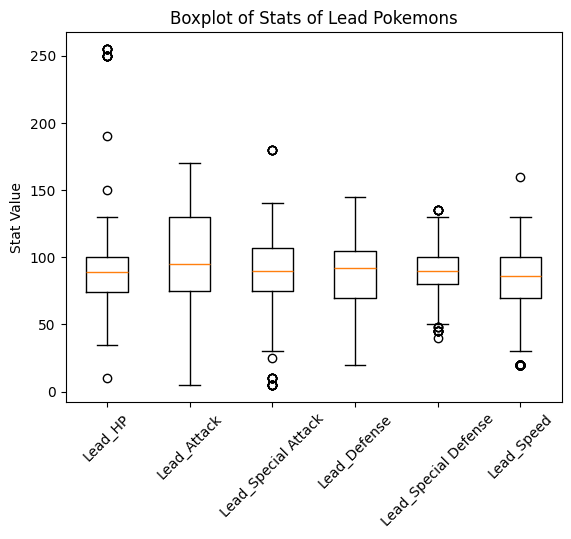

In [62]:
plots = ['Lead_HP', 'Lead_Attack', 'Lead_Special Attack', 'Lead_Defense', 'Lead_Special Defense', 'Lead_Speed']

plt.boxplot([unique_players_df[plot].dropna() for plot in plots], tick_labels=plots)
plt.title("Boxplot of Stats of Lead Pokemons")
plt.xticks(rotation=45)
plt.ylabel("Stat Value")
plt.show()

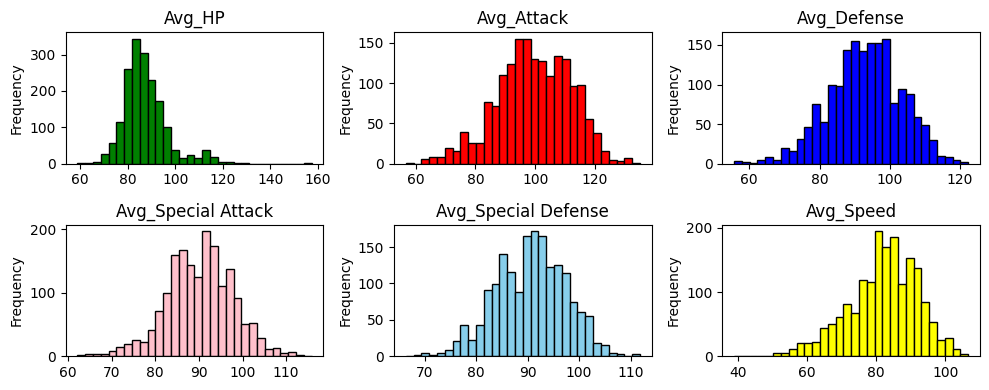

In [60]:
unique_players_df = gen5ou_df.drop_duplicates(subset="Player", keep="first")
unique_players_df

fig, ax = plt.subplots(2, 3, figsize=(10, 4))

ax[0,0].hist(unique_players_df['Avg_HP'].dropna(),bins=30, color='green', edgecolor='black')
ax[0,0].set_title('Avg_HP')
ax[0,0].set_ylabel('Frequency')

ax[0,1].hist(unique_players_df['Avg_Attack'].dropna(),bins=30, color='red', edgecolor='black')
ax[0,1].set_title('Avg_Attack')
ax[0,1].set_ylabel('Frequency')

ax[0,2].hist(unique_players_df['Avg_Defense'].dropna(),bins=30, color='blue', edgecolor='black')
ax[0,2].set_title('Avg_Defense')
ax[0,2].set_ylabel('Frequency')

ax[1,0].hist(unique_players_df['Avg_Special Attack'].dropna(),bins=30, color='pink', edgecolor='black')
ax[1,0].set_title('Avg_Special Attack')
ax[1,0].set_ylabel('Frequency')

ax[1,1].hist(unique_players_df['Avg_Special Defense'].dropna(),bins=30, color='skyblue', edgecolor='black')
ax[1,1].set_title('Avg_Special Defense')
ax[1,1].set_ylabel('Frequency')

ax[1,2].hist(unique_players_df['Avg_Speed'].dropna(),bins=30, color='yellow', edgecolor='black')
ax[1,2].set_title('Avg_Speed')
ax[1,2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

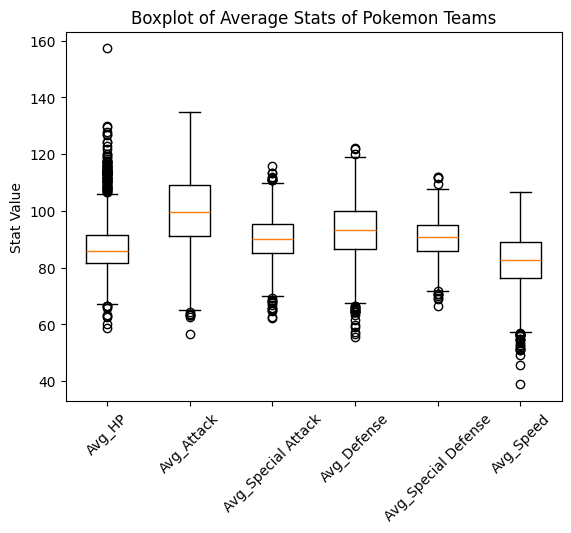

In [61]:
plots = ['Avg_HP', 'Avg_Attack', 'Avg_Special Attack', 'Avg_Defense', 'Avg_Special Defense', 'Avg_Speed']

plt.boxplot([unique_players_df[plot].dropna() for plot in plots], tick_labels=plots)
plt.title("Boxplot of Average Stats of Pokemon Teams")
plt.xticks(rotation=45)
plt.ylabel("Stat Value")
plt.show()